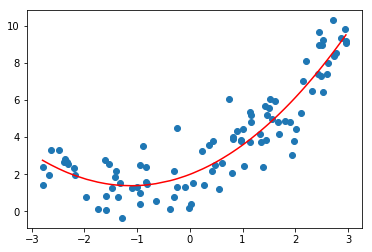

why is it called linear regression if the relationship between x and y is polynomial? Because a Plynomial Linear Regression can be expressed as a linear combination of coefficientes
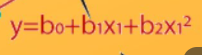

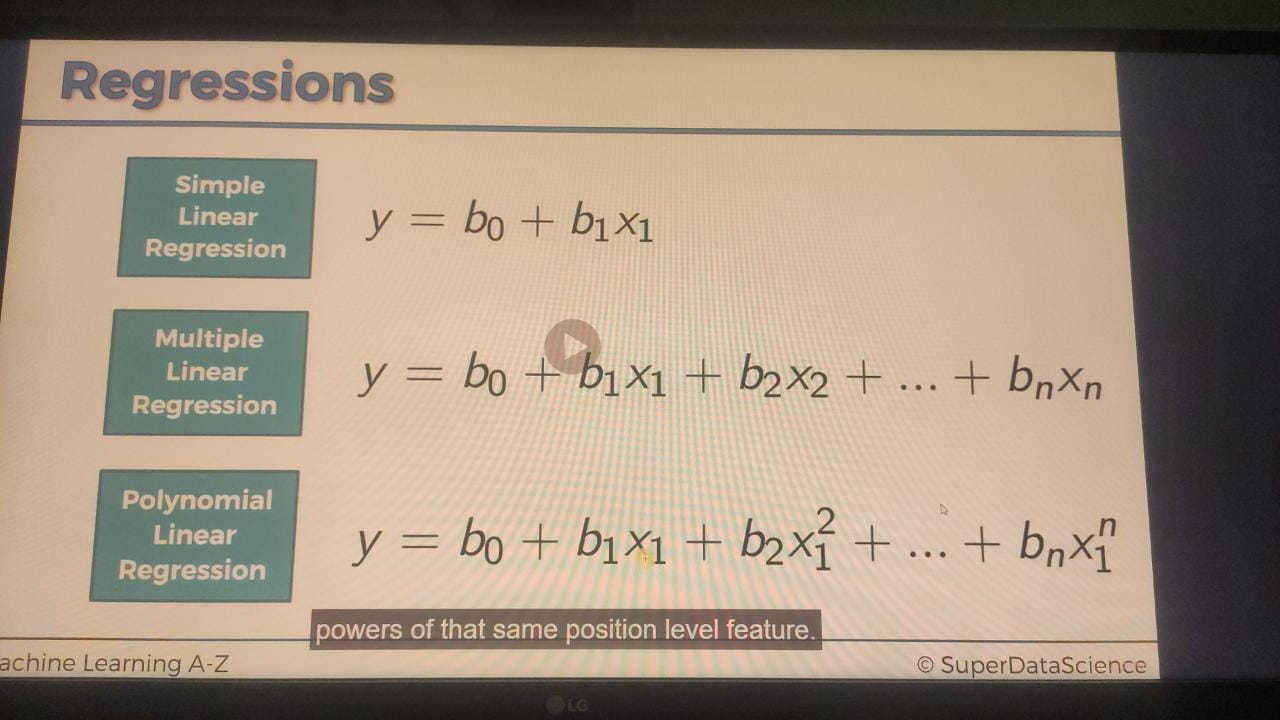

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")
X= dataset.iloc[:,1:-1]
y= dataset.iloc[:,-1]

Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

Polynomial Linear Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

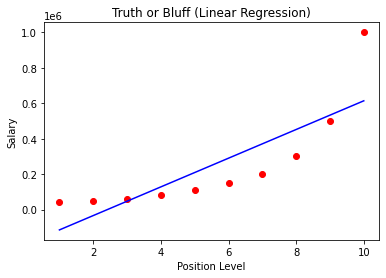

In [11]:
plt.scatter(X,y, color  = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

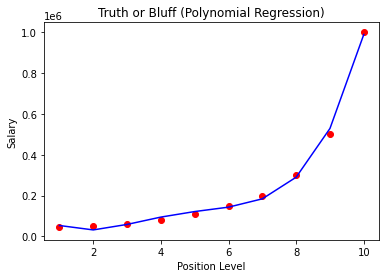

In [12]:
plt.scatter(X, y, color  = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Visualising the Polynomial Regression results (for higher resolution and smoother curve)

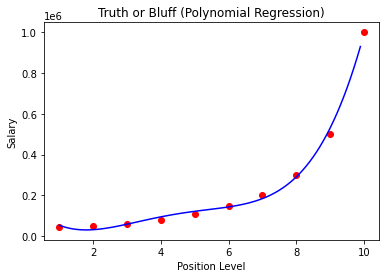

In [23]:
X_grid = np.arange(min(X.values), max(X.values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color ="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Predicting a new result with Linear Regression

In [24]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Predicting a new result with Polynomial Regression

In [26]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

-------------------------------------------

In [68]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

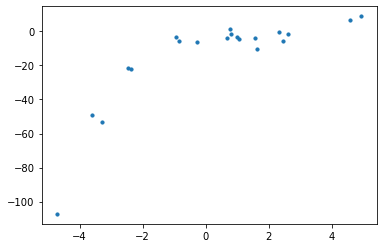

In [69]:
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [70]:
x = x[:, np.newaxis] # add a new dimension
y = y[:, np.newaxis]

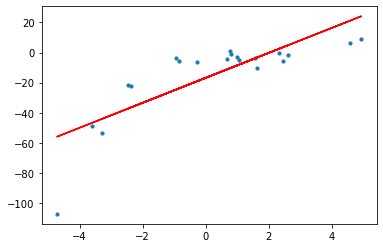

15.908242501429998
0.6386750054827146


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)
r2 = r2_score(y,y_pred)
print(r2)

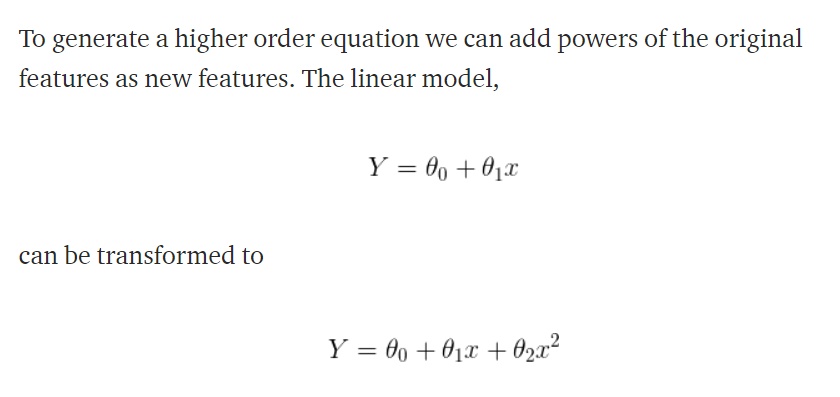
This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

In [63]:
x

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

10.120437473614711
0.8537647164420812


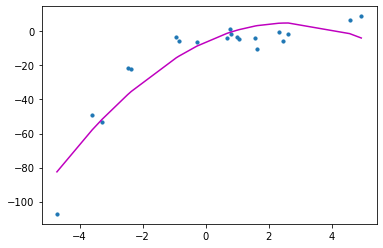

In [64]:
import operator
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [65]:
(-3.29215704)**2

10.838297976021563

In [66]:
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

3.449895507408724
0.9830071790386679


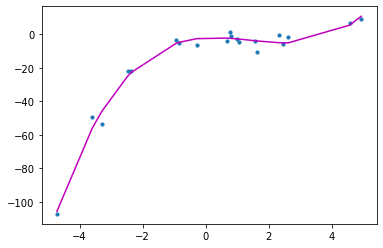

In [71]:
import operator
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

If we further increase the degree to 20, we can see that the curve passes through more data points. Below is a comparison of curves for degree 3 and 20.
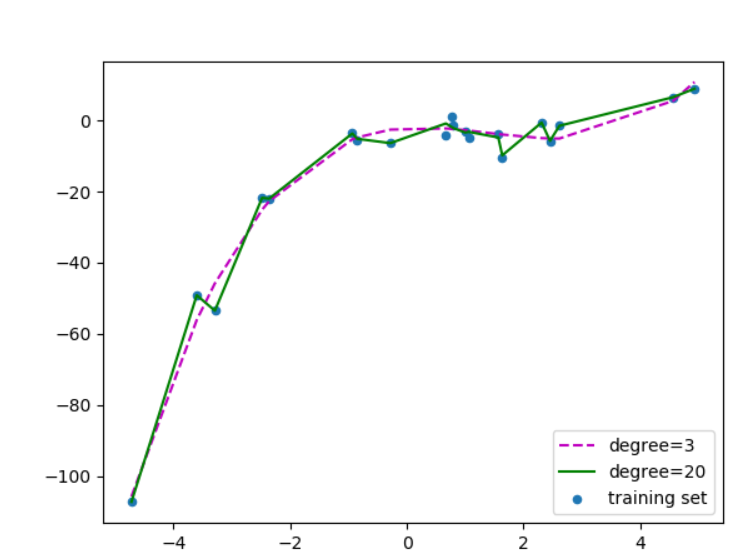

For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).

#### The Bias vs Variance trade-off
Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.
Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.